In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\DELL\Desktop\Statistics\KAGGLE\fly\book\video_games_sales.csv')

In [3]:
df.head(7)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E


the dataset contains info about video games sales with detailed info about name of game year of relase and sales and critics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [5]:
# we will concentrate on sales so we drop unrelated columns starting from column 10
# all columns starting from 10 have almost 50% of the values missing so we cant study them
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [11]:
dff=df[df.columns[0:10]].copy()
dff

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01


In [7]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


In [8]:
# there are null values in the first five columns
dff['Name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [12]:
dff['Name']=dff['Name'].fillna('unknown')
dff['Platform']=dff['Platform'].fillna('unknown')
dff['Genre']=dff['Genre'].fillna('unknown')
dff['Publisher']=dff['Publisher'].fillna('unknown')

In [13]:
dff['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [14]:
dff['Year_of_Release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year_of_Release, dtype: int64

In [15]:
# we will drop the games with unknown release year
dff=dff.dropna()

In [16]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16450 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16450 non-null  object 
 1   Platform         16450 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16450 non-null  object 
 4   Publisher        16450 non-null  object 
 5   NA_Sales         16450 non-null  float64
 6   EU_Sales         16450 non-null  float64
 7   JP_Sales         16450 non-null  float64
 8   Other_Sales      16450 non-null  float64
 9   Global_Sales     16450 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [17]:
# now we will try to see the games with best sales
dff['Year_of_Release'].min()

1980.0

In [18]:
dff['Year_of_Release'].max()

2020.0

we study games that are released between 1980 and 2020

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  Text(32, 0, '2012.0'),
  T

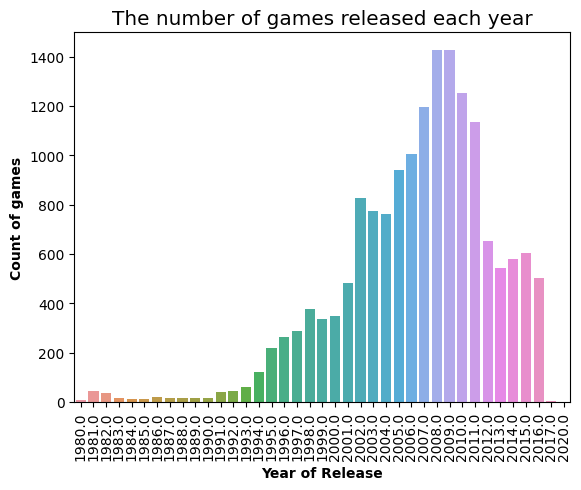

In [86]:
# now lets see the number of games released each year
k=dff['Year_of_Release'].value_counts()
k=k.sort_index(ascending=True)
sns.barplot(x=k.index,y=k.values)
z=np.arange(1980,2030,20)
#plt.xticks(rotation=90)
plt.xlabel('Year of Release',fontweight='heavy')
plt.ylabel('Count of games',fontweight='heavy')
plt.title('The number of games released each year',fontsize='x-large')
plt.xticks(rotation=90)
#plt.xticks(np.arange(1980,2020,1))   
    

#plt.xticks(np.arange(1980,230,10),rotation=90)

we can see that the number of games started increaseing each year after 1990 it was the largest between 2003 and 2011
after 2011 the number decreased suddenly and become much smaller compared to numbers in 2003 to 2011.
the number of counted released games reaches climax at years 2008 and 2009.

Text(0.5, 1.0, 'The sales of video games through years in many countries')

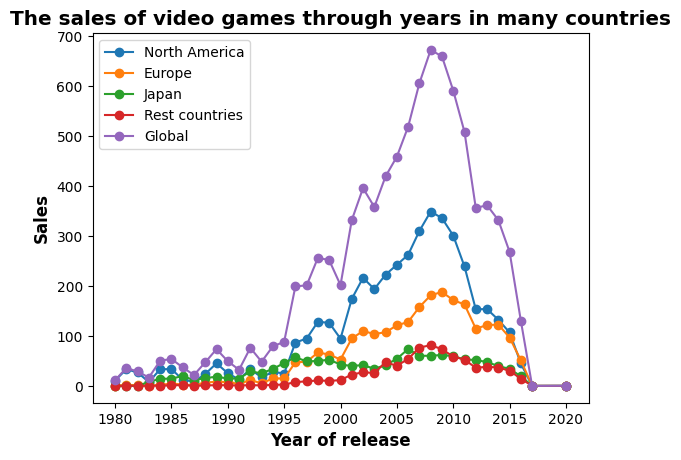

In [67]:
# now we want to see how the sales of video games increased each year in each country
group=dff.groupby(['Year_of_Release'])[dff.columns[5:]].sum()
for i in group.columns:
    plt.plot(group.index,group[i],marker='o')
plt.legend(['North America','Europe','Japan','Rest countries','Global'])
plt.xlabel('Year of release',fontweight='heavy',fontsize='large')
plt.ylabel('Sales',fontweight='heavy',fontsize='large')
plt.title('The sales of video games through years in many countries',fontsize='x-large',fontweight='heavy')



we can see that video games sales increased each year after 1980 globaly and especially in north America we can
see that the climax of sales globally is between 2005 and 2010 the same goes for north America sales sales in Europe
also increased very much between 2005 and 2010 and for all countries we can notice the sudden sharp decrease in sales
after 2011 the amount of sales after 2011 is small compared to amount of sales between 2005 and 2010


In [73]:
# now we will see the number of publishers each year
num=dff.groupby('Year_of_Release')['Publisher'].apply(len)
num

Year_of_Release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
2017.0       3
2020.0       1
Name: Publisher, dtype: int64

Text(0.5, 1.0, 'Number of video game publishers each year')

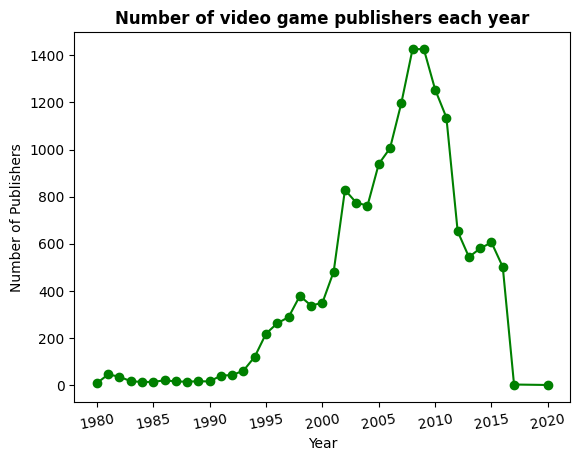

In [82]:
# now we will seehow many publishers do we have each year
plt.plot(num.index,num,marker='o',color='green')
plt.xticks(np.arange(1980,2025,5),rotation=10)
plt.xlabel('Year')
plt.ylabel('Number of Publishers')
plt.title('Number of video game publishers each year',fontweight='heavy')

we can see that after 1990 the number of publishers increased so much (we remeber that sales around the world increased too
after 2000) after 2000 the number of publishers kept increasing and reached the climax between 2005 and 2010(in this
interval the sales where the best globally so it makes sense to see the largest number of publisher in the time of largest
sales) but after 2011 the number of publishers decreased so much it even become less than number of publisher between
2000 and 2005. after 2011  it makes sense to see that the number of publishers is so small an that is because the sales
at that interval are so small.

In [91]:
# now we can see that the period between 2005 and 2010 is the best peroid for video games lets study it in detail
# first we will see the number of game platforms  each year
plat=dff.groupby('Year_of_Release')['Platform'].value_counts()
plat

Year_of_Release  Platform
1980.0           2600         9
1981.0           2600        46
1982.0           2600        36
1983.0           2600        11
                 NES          6
                             ..
2016.0           X360        13
                 Wii          1
2017.0           PSV          2
                 PS4          1
2020.0           DS           1
Name: Platform, Length: 241, dtype: int64

In [94]:
fd=dff.groupby('Year_of_Release')['Platform'].apply(len)
fd

Year_of_Release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
2017.0       3
2020.0       1
Name: Platform, dtype: int64

Text(0.5, 1.0, 'The number video platforms each year')

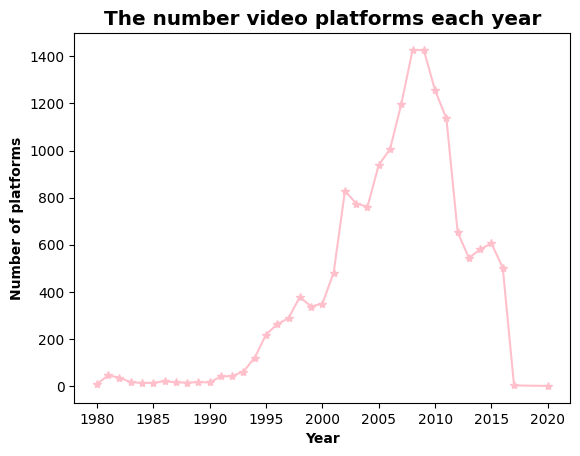

In [97]:
date=np.arange(1980,2021,1)
plt.plot(fd.index,fd.values,marker='*',color='pink')
plt.xlabel('Year',fontweight='heavy')
plt.ylabel('Number of platforms',fontweight='heavy')
plt.title('The number video platforms each year',fontweight='heavy',fontsize='x-large')


from the plot we can see that the number of video games platforms increased rapidly after 1990 and the largest
number of video games platfrom was during the peroid of best sales between 2005 and 2010 and the number of platfroms
decreased so much after sales falling (after year 2011) so the number of platfroms decreased with the decrease of sales.

In [106]:
group1=group.sum(axis=1)
group1


Year_of_Release
1980.0      22.76
1981.0      71.45
1982.0      57.74
1983.0      33.59
1984.0     100.71
1985.0     107.89
1986.0      74.15
1987.0      43.44
1988.0      94.43
1989.0     146.90
1990.0      98.76
1991.0      64.46
1992.0     152.33
1993.0      96.81
1994.0     158.41
1995.0     176.23
1996.0     398.30
1997.0     402.05
1998.0     512.76
1999.0     502.36
2000.0     403.24
2001.0     662.93
2002.0     790.48
2003.0     715.34
2004.0     837.73
2005.0     916.13
2006.0    1035.93
2007.0    1210.12
2008.0    1343.29
2009.0    1317.70
2010.0    1180.72
2011.0    1015.37
2012.0     711.68
2013.0     722.48
2014.0     663.04
2015.0     536.03
2016.0     260.04
2017.0       0.12
2020.0       0.58
dtype: float64

Text(0.5, 1.0, 'The relationship between video games sales and number of platfroms')

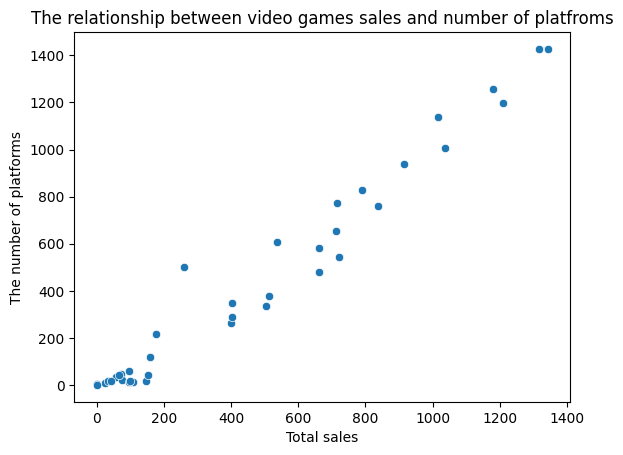

In [108]:
# now we want to see the relationship between the number of video platforms each year and sales
# does the increase of sales increase the number of platfroms and vice versa?
sns.scatterplot(x=group1,y=fd.values)
plt.xlabel('Total sales')
plt.ylabel('The number of platforms')
plt.title('The relationship between video games sales and number of platfroms')

somehow we can detect a linear relationship and the increase of sales can increase the number of platforms

In [109]:
d={}
d['Sales']=group1.values
d['platforms_num']=fd.values
d['Publishers_num']=num.values
dd=pd.DataFrame(d,index=group1.index)
dd

,Sales,platforms_num,Publishers_num
Year_of_Release,,,
1980.0,22.76,9,9
1981.0,71.45,46,46
1982.0,57.74,36,36
1983.0,33.59,17,17
1984.0,100.71,14,14
1985.0,107.89,14,14
1986.0,74.15,21,21
1987.0,43.44,16,16
1988.0,94.43,15,15


In [110]:
dd.corr()

,Sales,platforms_num,Publishers_num
Sales,1.00000,0.98182,0.98182
platforms_num,0.98182,1.00000,1.00000
Publishers_num,0.98182,1.00000,1.00000


from the correlation matrix above we can see that there is a strong linear relationship between sales
and number of publishers and we can say that the number of publishers increases with sales increase

also we notice that the number of publishers is the same as the number of platforms

In [111]:
# now we will try to see the popular genres for video games and then we try to see if it changed with years
dff['Genre'].value_counts()

Action          3308
Sports          2306
Misc            1721
Role-Playing    1483
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       858
Fighting         837
Strategy         673
Puzzle           569
unknown            2
Name: Genre, dtype: int64

In [113]:
dff['Genre']=dff['Genre'].replace({'unknown':'Action'})
gen=dff['Genre'].value_counts()
gen

C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Action          3310
Sports          2306
Misc            1721
Role-Playing    1483
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       858
Fighting         837
Strategy         673
Puzzle           569
Name: Genre, dtype: int64

we can see that Action and sport games are the most popular games because they have the largest count
and puzzle games are the least popular among the genres.

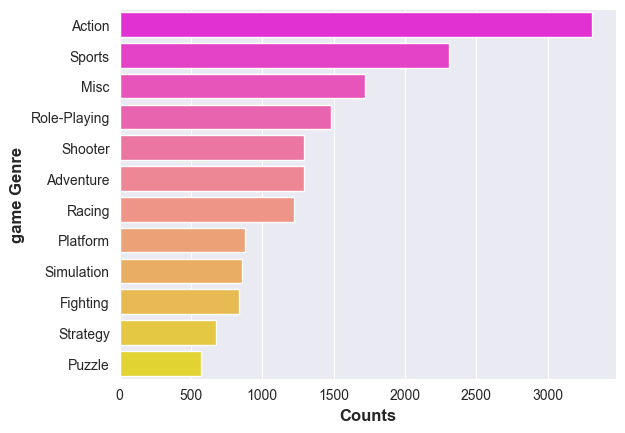

In [119]:
sns.barplot(y=gen.index,x=gen,palette='spring')
plt.xlabel('Counts',fontweight='heavy',fontsize='large')
plt.ylabel('game Genre',fontsize='large',fontweight='heavy')
sns.set_style('darkgrid')

In [ ]:
# now we will see the most popular genres throughout the years

In [125]:
cc=pd.crosstab(index=df['Year_of_Release'],columns=df['Genre'])
cc

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year_of_Release,,,,,,,,,,,,
1980.0,1,0,1,4,0,0,0,0,2,0,1,0
1981.0,25,0,0,0,3,2,1,0,10,1,4,0
1982.0,18,0,0,1,5,3,2,0,5,0,2,0
1983.0,7,1,0,1,5,1,0,0,1,0,1,0
1984.0,1,0,0,1,1,3,3,0,3,0,2,0
1985.0,2,0,1,0,4,4,0,0,1,1,1,0
1986.0,6,0,0,0,6,0,1,1,4,0,3,0
1987.0,2,1,2,0,2,0,0,3,2,0,4,0
1988.0,2,0,0,0,4,1,1,3,1,1,2,0


In [130]:
# now we want to see the most popular genres in 2008 where te sales of video games are so good
kp=cc.loc[2008].sort_values(ascending=False)
kp

Genre
Action          221
Misc            212
Sports          200
Adventure       166
Simulation      119
Role-Playing    112
Shooter          83
Racing           82
Puzzle           64
Platform         62
Fighting         56
Strategy         50
Name: 2008.0, dtype: int64

Text(0.5, 1.0, 'Most popular genres in 2008')

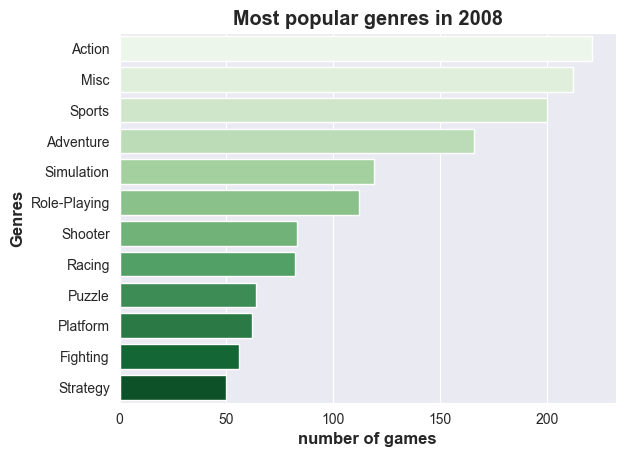

In [132]:
sns.barplot(x=kp,y=kp.index,palette='Greens')
plt.xlabel('number of games',fontweight='heavy',fontsize='large')
plt.ylabel('Genres',fontweight='heavy',fontsize='large')
plt.title('Most popular genres in 2008',fontsize='x-large',fontweight='heavy')

we can see from the Pareto barchart that Action was the most popular genre for games and Misc is the second most popular
and the least popular genre for video games at 2008 is Strategy games.

Text(0.5, 1.0, 'popularity of game genre through years')

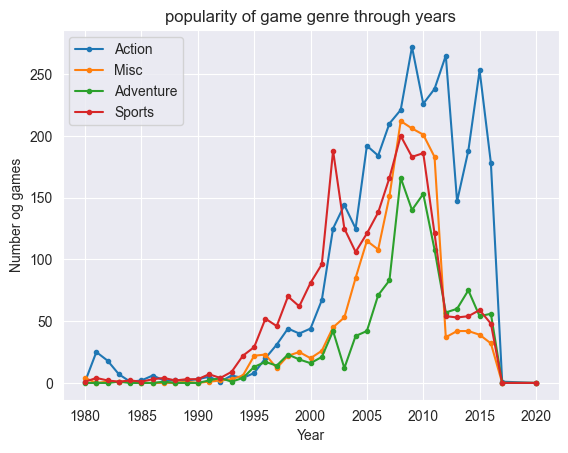

In [134]:
# now we will check the popularty of Action Misc Adventure and sport through the years
lis=['Action','Misc','Adventure','Sports']
for i in lis:
    plt.plot(cc.index,cc.loc[:,i],marker='.')
plt.legend(lis)
plt.xlabel('Year')
plt.ylabel('Number og games')
plt.title('popularity of game genre through years')

in the interval between 1990 and 2002 sports games has the largest counts Action games came second in count and starting 
from year 2004  games of Action genre has the largest counts  and from 2008 to 2010 Misc games comes second in counts
after action genre and it exceeds the count of sport games which means that maybe at that time Misc games were more
popular than Sports games.
in the interval between 2011 and 2015 Misc games was the least popular games among the four genres with the smallest game
counts.

In [135]:
# now we will check the sales of each genre which genre brings the best sales each year
dff.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [138]:
dff['Platform'].unique().size

31

In [141]:
dff['Total_Sales']=dff[dff.columns[5:]].sum(axis=1)
dff['Total_Sales']

C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0        495.21
1        241.44
2        213.12
3        196.62
4        188.25
          ...  
16714      0.06
16715      0.06
16716      0.06
16717      0.06
16718      0.06
Name: Total_Sales, Length: 16450, dtype: float64

In [142]:
# first the genere with highest sales through out the years
dv=dff.groupby('Genre')['Total_Sales'].sum()
dv

Genre
Action          10317.00
Adventure        1400.37
Fighting         2655.87
Misc             4743.69
Platform         4954.23
Puzzle           1440.66
Racing           4341.57
Role-Playing     5586.09
Shooter          6249.57
Simulation       2329.95
Sports           7860.18
Strategy         1036.26
Name: Total_Sales, dtype: float64

Text(0.5, 1.0, 'Sales portions of video game sales for each Genre')

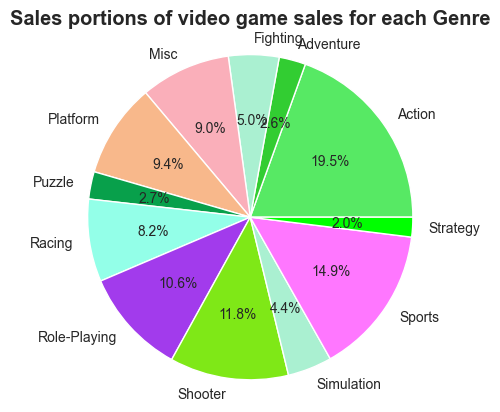

In [196]:
plt.pie(dv.values,labels=dv.index,colors=['#57E964','#32CD32','#AAF0D1','#FAAFBA','#F8B88B','#08A04B','#93FFE8','#A23BEC',
                                         '#7FE817','#AAF0D1','#FF77FF','#00FF00','#6AFB92'],autopct='%1.1f%%',radius=1.1)
plt.title('Sales portions of video game sales for each Genre',fontweight='heavy',fontsize='x-large')

from the pie chart above we can see that the genre of video games that has the largest sales is Action and sport games
come second in largest sales puzzle and aventure games  have the smallest sales shares .

In [148]:
shares=pd.crosstab(index=dff['Year_of_Release'],columns=dff['Genre'],values=dff['Total_Sales'],aggfunc=[np.sum])
shares=shares.fillna(0)
shares

sum                                                      \
Genre            Action Adventure Fighting    Misc Platform  Puzzle  Racing   
Year_of_Release                                                               
1980.0             2.04      0.00     4.62   16.23     0.00    0.00    0.00   
1981.0            88.89      0.00     0.00    0.00    41.55   13.47    2.88   
1982.0            39.06      0.00     0.00    5.22    30.18   60.21    9.42   
1983.0            17.16      2.40     0.00   12.84    41.58    4.68    0.00   
1984.0            11.10      0.00     0.00    8.70     4.14   18.84   35.70   
1985.0            21.12      0.00     6.30    0.00   259.02   19.26    0.00   
1986.0            82.44      0.00     0.00    0.00    56.34    0.00   11.76   
1987.0             6.69     26.28    32.52    0.00    10.44    0.00    0.00   
1988.0            10.47      0.00     0.00    0.00   166.38   33.48   12.84   
1989.0            27.87      0.00     0.00    7.68   123.96  226.50    0.00   
1990.0            38.34      0.00     0.00    0.00   137.85   35.97   37.53   
1991.0            40.56     13.44     2.34    0.48    45.81   19.44    6.84   
1992.0            23.01     73.47    91.44   29.64    80.49   29.04   54.27   
1993.0            25.38      0.42    52.50    1.80   112.05   19.02    2.16   
1994.0             9.30     22.44    50.88   17.16   172.50    9.18   13.11   
1995.0            21.45      4.29    89.07   38.40   100.14   16.20   36.54   
1996.0           123.54     25.11   108.30   64.02   169.38   23.49  169.53   
1997.0           165.51     29.79    70.68   34.11   131.13   35.28  191.49   
1998.0           236.55     54.27   190.02   71.52   179.13   38.07  167.34   
1999.0           166.50     45.63    85.71  123.99   124.86    8.10  223.38   
2000.0           204.06     17.82   121.44   93.27    96.33   22.95  119.97   
2001.0           356.31     54.78   108.66   98.37   235.83   47.82  334.92   
2002.0           520.23     66.42   149.82   93.90   275.76   32.01  181.05   
2003.0           407.73     12.78   142.56  142.83   257.10   14.52  313.11   
2004.0           457.14     51.93   100.62  187.44   283.32   50.40  287.10   
2005.0           512.76     50.70   118.08  366.15   140.13  122.34  336.18   
2006.0           396.57     68.19   134.52  402.12   295.92   64.62  203.01   
2007.0           629.46    144.69   104.94  548.94   210.51  141.90  232.95   
2008.0           809.91    148.02   210.18  516.33   210.81   91.56  420.21   
2009.0           826.05    121.29   191.34  454.83   243.33  118.77  202.02   
2010.0           692.34     95.88    88.23  571.02   186.06   64.47  206.19   
2011.0           700.32     93.66   134.34  326.49   166.17   29.73  208.92   
2012.0           715.05     34.77    55.14  133.29   110.22   10.32   81.87   
2013.0           735.24     36.48    42.39  151.65   147.39    5.73   74.10   
2014.0           583.59     33.54    95.04  140.19    52.77    8.94   99.90   
2015.0           432.18     48.93    47.46   69.39    36.33    4.29   48.42   
2016.0           181.02     22.95    26.73   15.69    19.32    0.06   16.86   
2017.0             0.06      0.00     0.00    0.00     0.00    0.00    0.00   
2020.0             0.00      0.00     0.00    0.00     0.00    0.00    0.00   

                                                                  
Genre           Role-Playing Shooter Simulation  Sports Strategy  
Year_of_Release                                                   
1980.0                  0.00   42.42       0.00    2.97     0.00  
1981.0                  0.00   60.18       2.67    4.71     0.00  
1982.0                  0.00   22.80       0.00    6.33     0.00  
1983.0                  0.00    2.91       0.00   19.20     0.00  
1984.0                  0.00  186.60       0.00   37.05     0.00  
1985.0                  0.00    6.00       0.21   11.76     0.00  
1986.0                 15.12   23.34       0.00   33.45     0.00  
1987.0                 27.90   

Text(0.5, 1.0, 'Sales of video games of specific genres yearly')

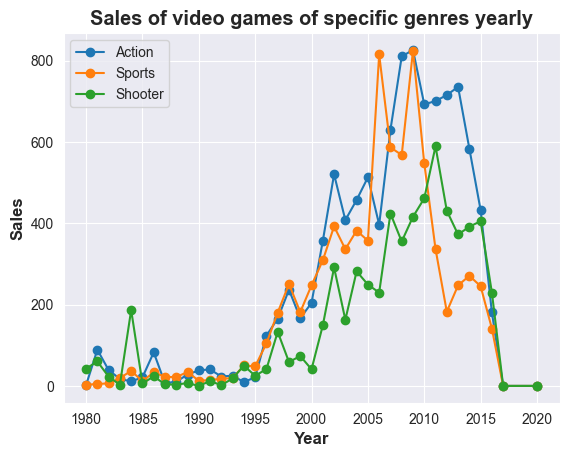

In [156]:
# action sport and shooter are the most popular genres we check their sales yearly
lisa=['Action','Sports','Shooter']
for i in lisa:
    plt.plot(shares.index,shares.loc[:,('sum', i)],marker='o')
plt.legend(lisa)
plt.xlabel('Year',fontweight='heavy',fontsize='large')
plt.ylabel('Sales',fontweight='heavy',fontsize='large')
plt.title('Sales of video games of specific genres yearly',fontsize='x-large',fontweight='heavy')

from 1995 to 2000 the sales amount of Action games and sales amount for sport games wre so close to each other and
the maximmsales wre during interval between 2006 and 2010 at 2009 the sales of Action and sports gemaes reached
the largest amount there almost had the same sales amount but in year 2008 the sales of Action games was
much larger than sales of sports and regardless of the genre the sales decrease after 2010

In [160]:
shares.loc[2008,('sum','Action')]

809.91

In [161]:
shares.loc[2008,('sum','Sports')]

567.63

In [164]:
# now we want to see the sales shares for platforms to see the platform with highest sales
kss=dff.groupby('Platform')['Total_Sales'].sum().sort_values(ascending=False)
kss

Platform
PS2     7401.06
X360    5767.89
PS3     5587.47
Wii     5348.76
DS      4820.40
PS      4364.97
PS4     1885.23
GBA     1879.32
PSP     1737.96
3DS     1547.19
PC      1536.96
GB      1526.55
XB      1510.98
NES     1506.36
N64     1308.66
SNES    1200.27
GC      1181.61
XOne     956.28
2600     519.15
WiiU     493.05
PSV      323.04
SAT      201.54
GEN      184.65
DC        95.76
SCD       11.19
NG         8.64
WS         8.52
TG16       0.96
3DO        0.60
GG         0.24
PCFX       0.18
Name: Total_Sales, dtype: float64

we can see that PS2 is the plaform that has the highest sales for video games X360 comes second and PCFX platform
has the smallest sales for its video games

<AxesSubplot:xlabel='Total_Sales', ylabel='Platform'>

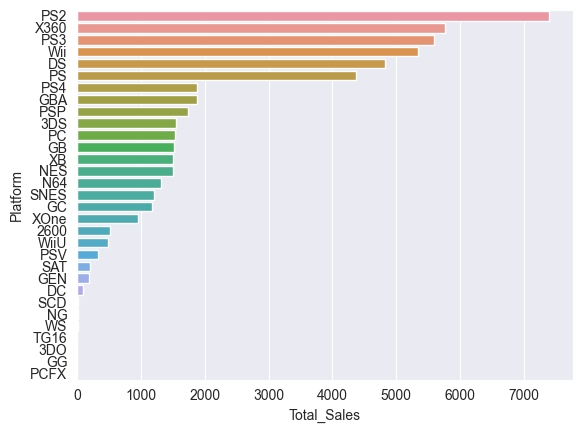

In [165]:
sns.barplot(x=kss,y=kss.index)

In [167]:
# now we will see the sales of PS2 platform yearly
ps2=dff.loc[dff['Platform']=='PS2']
pp=ps2.groupby('Year_of_Release')['Total_Sales'].sum()
pp

Year_of_Release
2000.0     234.84
2001.0     998.58
2002.0    1232.34
2003.0    1105.80
2004.0    1270.77
2005.0     963.93
2006.0     620.52
2007.0     455.97
2008.0     323.19
2009.0     158.55
2010.0      33.81
2011.0       2.76
Name: Total_Sales, dtype: float64

Text(0.5, 1.0, 'Yearly Sales of PS2 game platform')

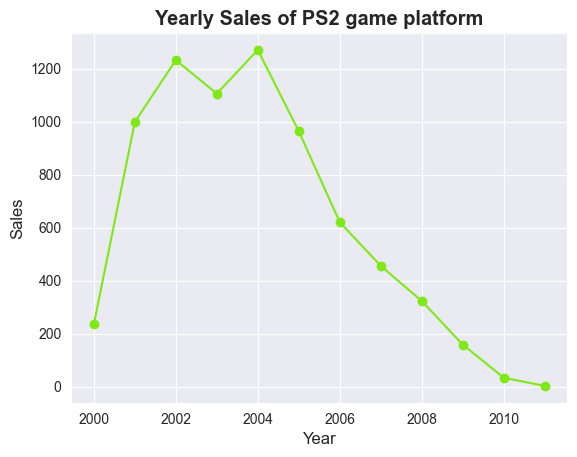

In [168]:
plt.plot(pp.index,pp,marker='o',color='#7FE817')
plt.xlabel('Year',fontsize='large')
plt.ylabel('Sales',fontsize='large')
plt.title('Yearly Sales of PS2 game platform',fontsize='x-large',fontweight='heavy')

from the plot we can see that even though this plaform has the largest sales number in the dataset it has got
the largest sales during years from 2002 to 2004 after that their sales decreased so much and apparently they
havenot sold anything after 2011

In [171]:
# now we study in detail the peroid that has the best sales for video games which is between 2005 and 2010
best=dff.loc[dff['Year_of_Release'].isin(range(2007,2011))]

In [172]:
best

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Total_Sales
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,213.12
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,196.62
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,169.92
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,136.20
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,130.89
...,...,...,...,...,...,...,...,...,...,...,...
16704,Mezase!! Tsuri Master DS,DS,2009.0,Sports,Hudson Soft,0.00,0.00,0.01,0.00,0.01,0.06
16705,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,Falcom Corporation,0.00,0.00,0.01,0.00,0.01,0.06
16708,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01,0.06
16709,15 Days,PC,2009.0,Adventure,DTP Entertainment,0.00,0.01,0.00,0.00,0.01,0.06


In [173]:
# lets say we want to see how was the sales in 2008 who are the platforms puplishers games with best sales?
best_10=best.loc[best['Year_of_Release']==2008]

In [175]:
dff['Publisher'].unique().size

580

In [177]:
# top ten publishers with largest sales
# now we want to know names of top ten games with largest sales in 2008 
bb=best_10.groupby('Name')['Total_Sales'].sum().sort_values(ascending=False).head(10)
bb

Name
Mario Kart Wii                                 213.12
Grand Theft Auto IV                            134.28
Call of Duty: World at War                      94.68
Super Smash Bros. Brawl                         77.04
Star Wars: The Force Unleashed                  60.21
Guitar Hero: World Tour                         60.00
Fallout 3                                       59.10
LEGO Indiana Jones: The Original Adventures     57.42
LEGO Batman: The Videogame                      54.33
FIFA Soccer 09                                  51.96
Name: Total_Sales, dtype: float64

Text(0.5, 1.0, 'top ten best sales games in 2008')

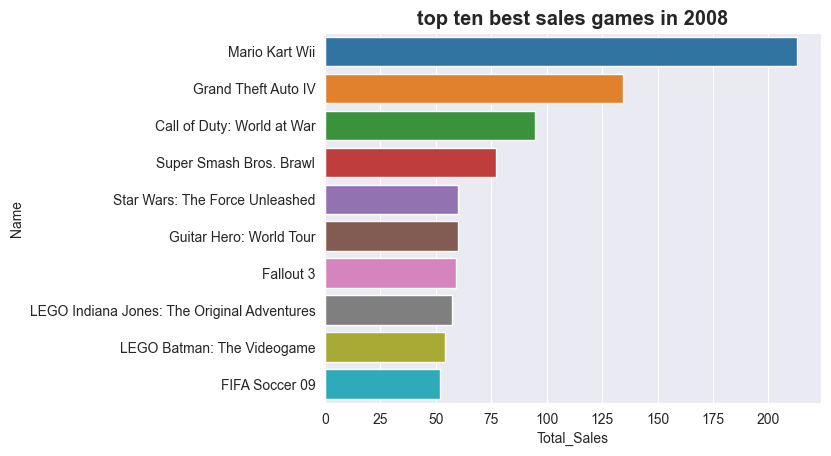

In [181]:
sns.barplot(x=bb,y=bb.index)
plt.title('top ten best sales games in 2008',fontsize='x-large',fontweight='heavy')




so mario Kart wi is the game with best sales in 2008 grand theft auto comes second in sales

In [185]:
# now to know top ten platforms with largest sales in 2008
plat=best_10.groupby('Platform')['Total_Sales'].sum().sort_values(ascending=False).head(7)
plat

Platform
Wii     1028.31
DS       872.28
X360     811.53
PS3      711.00
PS2      323.19
PSP      207.21
PC        75.03
Name: Total_Sales, dtype: float64

Text(0.5, 1.0, 'Top 7 video platfroms with largest sales in 2008')

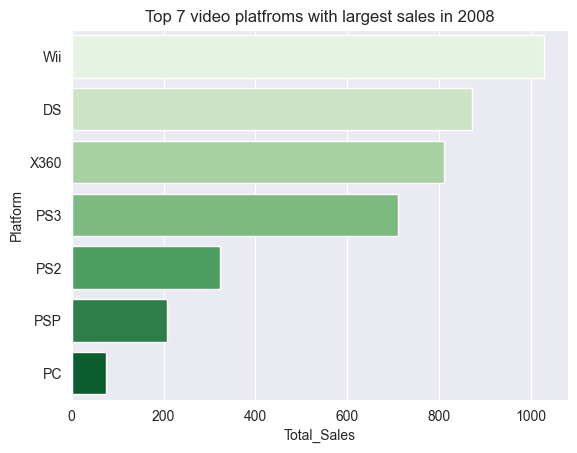

In [187]:
sns.barplot(x=plat,y=plat.index,palette='Greens')
plt.title('Top 7 video platfroms with largest sales in 2008')

we can see that wii palfrom and Ds plafroms has the best sales among all other video games platfroms.

In [189]:
# here we try to discover names of platforms for top 10 games in 2008
best_10.loc[best_10['Name'].isin(bb.index),'Platform'].unique()

array(['Wii', 'X360', 'PS3', 'DS', 'PS2', 'PSP', 'PC'], dtype=object)

we can see that top 10 games with best sales all belong to top 10 plafroms with best sales

In [197]:
# now we want to know top 7 publishers with best sales
pub=best_10.groupby('Publisher')['Total_Sales'].sum().sort_values(ascending=False).head(7)
pub

Publisher
Nintendo                539.91
Electronic Arts         500.37
Activision              401.25
Ubisoft                 341.22
Take-Two Interactive    275.13
Sega                    221.28
THQ                     180.96
Name: Total_Sales, dtype: float64

Text(0.5, 1.0, 'Top 7 video games publishers with best sales in 2008')

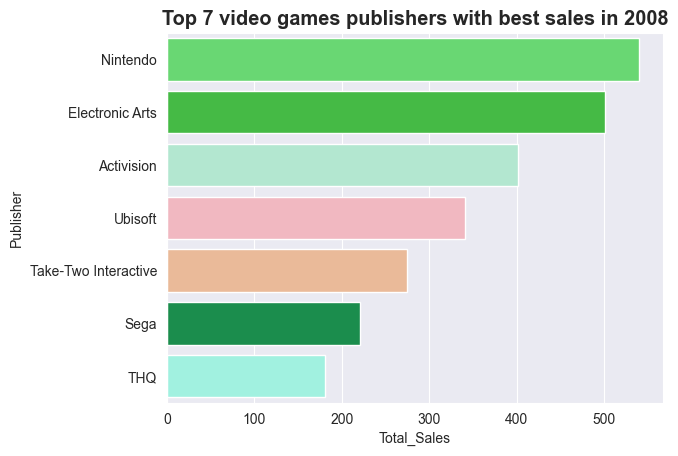

In [199]:
sns.barplot(x=pub,y=pub.index,palette=['#57E964','#32CD32','#AAF0D1','#FAAFBA','#F8B88B','#08A04B','#93FFE8'])
plt.title('Top 7 video games publishers with best sales in 2008',fontweight='heavy',fontsize='x-large')

we can see from the pareto bar chart above that Nitendo company has the best and largest sales in the video game publishing
industry in 2008 and Electronic Art comes second in best sales and Activision comes third and we can see the other companies
with good sales like Ubisoft Sega and others.

In [354]:
# now we saw the  games publishers and platforms with best sales in 2008 but what if we want info about other years?
# now we build functions to make information extraction about each year simpler.
# the first function takes the number of year as parameter and gives us basic info about this year
# the basic info includes publisers games and platforms with best sales in the specified year 
def year_statistic(year):
    best_10=dff.loc[dff['Year_of_Release']==year]
    #  10 games with best sales names 
    v1=best_10.groupby('Name')['Total_Sales'].sum().sort_values(ascending=False).head(10)
    # top 7 plafroms with best sales
    v2=best_10.groupby('Platform')['Total_Sales'].sum().sort_values(ascending=False).head(7)
    # top 7 publishers with best sales
    v3=best_10.groupby('Publisher')['Total_Sales'].sum().sort_values(ascending=False).head(7)
    # total video games sales in this year for all companies and games and platfroms
    #total=pd.DataFrame(best_10['Total_Sales'].sum())
    # sales of each genre
    v4=best_10.groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False).head(5)
    d={}
    #d['Year']=year
    d['Names']=v1
    d['Platforms']=v2
    d['Publishers']=v3
    d['Genre']=v4
    #d['Total']=total
    return d


In [356]:
# second function here creates the  visualizations for statistics made by former function it has one param 
# the param is the dictionary produced by former function
def visualize(year):
    d=year_statistic(year)
    
    fig=plt.figure()
    titles=['top ten best sales games in '+str(year),'Top 7 video platfroms with largest sales in '+str(year),
           'Top 7 video games publishers with best sales in '+str(year),'Video game sales for Top 5 genre in '+str(year)]
    for i,value in enumerate(d.keys()):
        plt.subplot(2,2,i+1)
        if i==2:
            plt.barh(y=d[value].index,width=d[value].values,color=['#57E964','#32CD32','#AAF0D1','#FAAFBA','#F8B88B','#08A04B','#93FFE8'])
        else:
            plt.barh(y=d[value].index,width=d[value].values)
        
        
        plt.xlabel('Sales')
        plt.title(titles[i],fontweight='heavy')
    fig.subplots_adjust(wspace=3,hspace=0.7)
    plt.suptitle(' Statistics of video games best sales at year '+str(year),fontweight='heavy',fontsize='x-large')



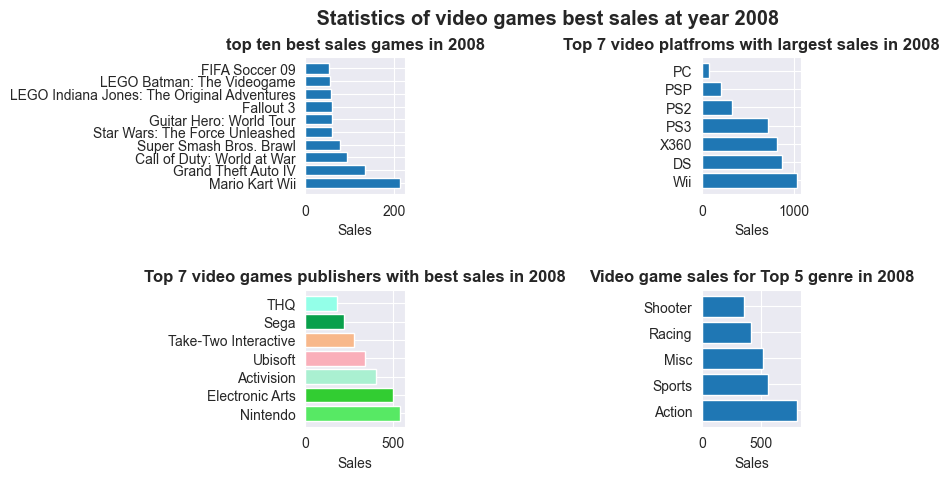

In [735]:
visualize(2008)

In [241]:
d.keys()

dict_keys(['Names', 'Platforms', 'Publishers'])

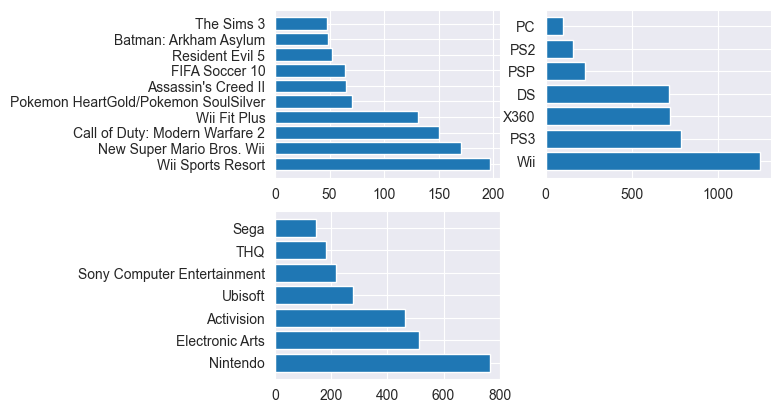

In [235]:
    lis=['Top 10 games with best sales']
    for i,value in enumerate(d.keys()):
        plt.subplot(2,2,i+1)
        plt.barh(y=d[value].index,width=d[value].values)
        plt.ylabel('Sales')

<BarContainer object of 10 artists>

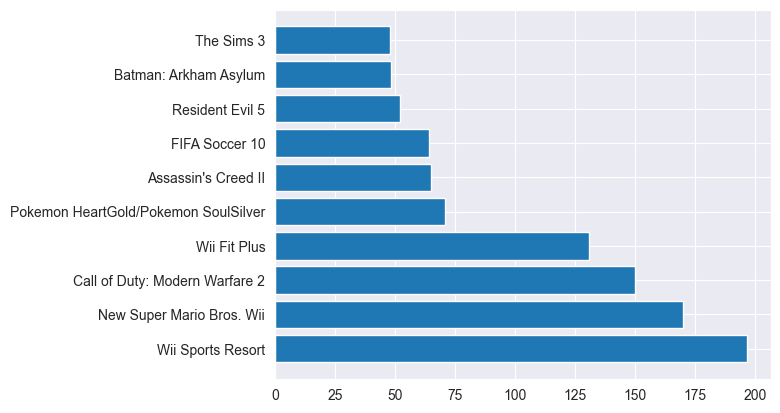

In [231]:
plt.barh(y=d['Names'].index,width=d['Names'].values)

In [232]:
for index,value in enumerate(d.keys()):
    print(index,' ',value)

0   Names
1   Platforms
2   Publishers


In [288]:
dv=dff.loc[(dff['Publisher']=='Nintendo')&(dff['Year_of_Release']==2008)]
dv.sort_values('Total_Sales',ascending=False).head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Total_Sales
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,213.12
39,Super Smash Bros. Brawl,Wii,2008.0,Fighting,Nintendo,6.62,2.55,2.66,1.01,12.84,77.04
90,Pokémon Platinum Version,DS,2008.0,Role-Playing,Nintendo,2.76,1.72,2.69,0.54,7.72,46.29
230,Animal Crossing: City Folk,Wii,2008.0,Simulation,Nintendo,1.82,1.12,1.32,0.36,4.62,27.72
415,Professor Layton and the Unwound Future,DS,2008.0,Puzzle,Nintendo,0.60,1.57,0.82,0.27,3.26,19.56


In [289]:
dv.shape[0]

32

In [302]:
drr=dff.groupby('Year_of_Release')
drr.get_group(2008).sort_values('Total_Sales',ascending=False)
dnn=drr
kr=dnn.get_group(2008).sort_values('Total_Sales',ascending=False)
kr.index=np.arange(kr.shape[0])


In [405]:
# publisher statistic name 
# total games,yearly sales ,top ten best selling games
# we build function to compare sales of two publishers and other statistics
def compare_pub(b1,b2,year):
    # first games num for both companies
    lis=[b1,b2]
    dil={}
    summ={}
    games={}
    for i in lis:
        dil[i]=dff.loc[(dff['Publisher']==i)&(dff['Year_of_Release']==year),'Name'].shape[0]
    # total sales for both companies in the spesific year
    
    
        summ[i]=dff.loc[(dff['Publisher']==i)&(dff['Year_of_Release']==year),'Total_Sales'].sum()
        games[i]=dff.loc[(dff['Publisher']==i)&(dff['Year_of_Release']==year),['Name','Total_Sales']].sort_values('Total_Sales',ascending=False).head(5)
        
    # top five best sell games for both companies
    d={}
    d['Number_of_games']=dil
    d['Total']=summ
    games[b1].index=np.arange(5)
    games[b2].index=np.arange(5)
    km1={games[b1]['Name'][i]:games[b1]['Total_Sales'][i] for i in range(5)}
    km2={games[b2]['Name'][i]:games[b2]['Total_Sales'][i] for i in range(5)}
    d[b1]=km1
    d[b2]=km2
    return d
    
    
    

In [424]:
pd.DataFrame(dff['Publisher'].unique(),columns=['val']).sort_values('val',ascending=True).tail(10)

,val
276,bitComposer Games
494,dramatic create
530,fonfun
415,iWin
505,id Software
486,imageepoch Inc.
357,inXile Entertainment
111,"mixi, Inc"
373,responDESIGN
79,unknown


In [409]:
dy=compare_pub('Nintendo','Ubisoft',2008)
dy['Nintendo'].keys()

dict_keys(['Mario Kart Wii', 'Super Smash Bros. Brawl', 'Pokémon Platinum Version', 'Animal Crossing: City Folk', 'Professor Layton and the Unwound Future'])

In [404]:
#plt.barh(y=list(dy['Total'].keys()),width=list(dy['Total'].values()))
sft=dy['Nintendo']
sft.index=np.arange(5)
sft

,Name,Total_Sales
0,Mario Kart Wii,213.12
1,Super Smash Bros. Brawl,77.04
2,Pokémon Platinum Version,46.29
3,Animal Crossing: City Folk,27.72
4,Professor Layton and the Unwound Future,19.56


In [414]:
#dy['Ubisoft']['Name']


In [350]:
#for j in dy['Number_of_games'].keys():
    plt.barh(y=)

dict_keys(['Nintendo', 'Ubisoft'])

In [429]:
# this function  visualizes the results of compare_pub function 
# takes three params the first two are the companies that we want to compare their sales the third is year

def visualize_compare_pub(b1,b2,year):
    dy=compare_pub(b1,b2,year)
    fig=plt.figure()
    titles=['Number of games by company in '+str(year),'Total sales by company in '+str(year),'Top 5 best sales games in '+b1+' '+str(year),'Top 5 best sales games in '+b2+' '+str(year)]
    lis=list(dy.keys())
    for ff,i in enumerate(lis):
        plt.subplot(2,2,ff+1)
        plt.barh(y=list(dy[i].keys()),width=list(dy[i].values()))
        plt.xlabel('Sales',fontweight='heavy')
        plt.title(titles[ff],fontweight='heavy',loc='left')
    fig.subplots_adjust(wspace=2,hspace=0.8)
    plt.suptitle(b1+' '+ 'VS '+b2+' '+' games Sales in '+str(year),fontweight='heavy',fontsize='x-large')
        
                
            
        
        
            
        
        
    
    
    
    
    
     


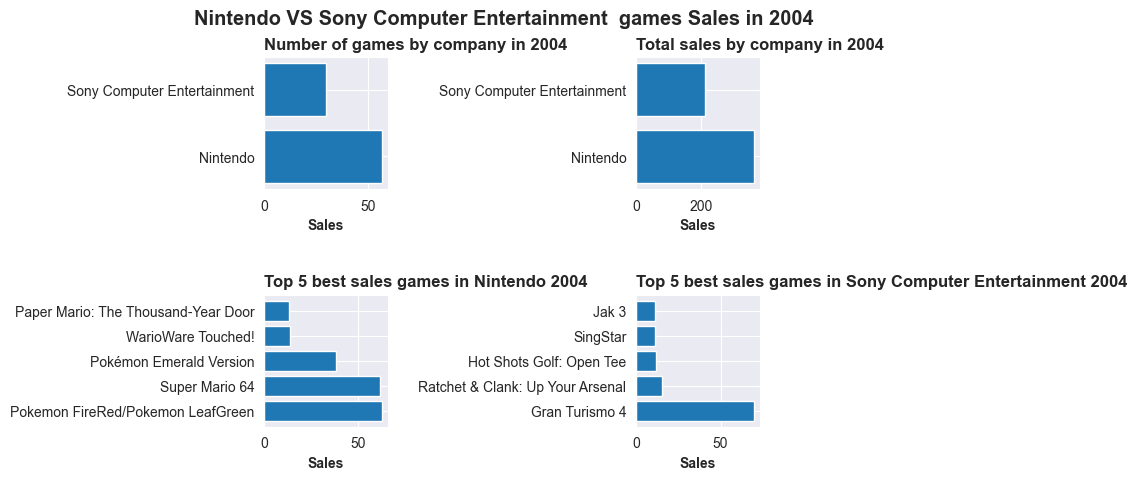

In [430]:
# now we will call visualize_compare_pub to compare the sales of games of two companies(publishers )
visualize_compare_pub('Nintendo','Sony Computer Entertainment',2004)

In [393]:
{i:i+1 for i in range(5)}

{0: 1, 1: 2, 2: 3, 3: 4, 4: 5}

In [499]:
# now we will add more filter functions to our list of functions  
# we saw how portions of sales are distributed between genre for all years
# what if we want to know the portions of sales for each genre in a specific year and graph it with a pie chart
def sales_genre_por(year):
    fil=dff.loc[dff['Year_of_Release']==year,['Total_Sales','Genre']]
    pie=fil.groupby('Genre')['Total_Sales'].sum()
    plt.pie(pie.values,labels=pie.index,autopct='%1.1f%%',colors=['#57E964','#32CD32','#AAF0D1','#FAAFBA','#F8B88B','#08A04B','#93FFE8','#A23BEC',
                                         '#7FE817','#AAF0D1','#FF77FF','#00FF00','#6AFB92'])
    plt.title(' Game Sales portions by Genre in '+str(year))

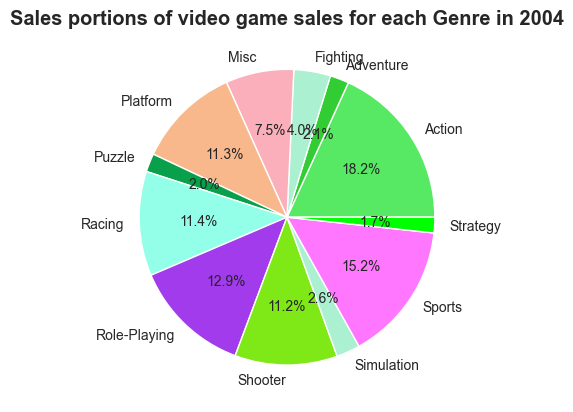

In [434]:
# now what is the genre of video games that has largest sales in 2004 and the sencond largest and the lowest?
sales_genre_por(2004)


now we can see that games of genre Action and sports have the largest sales portions in 2004 which means that people
prefer action and sports video games and prefer it more than other types puzzle games  has the lowest sales. 

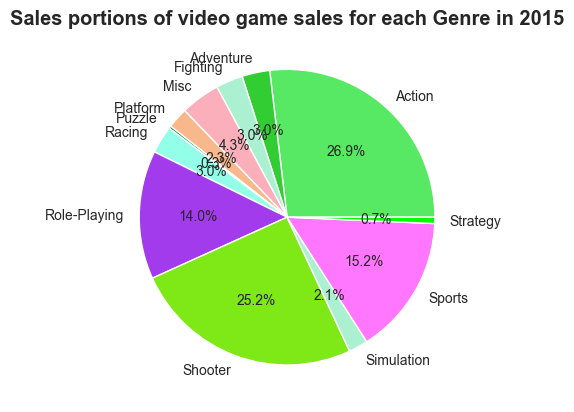

In [435]:
# now what are the sales portions of each genre in 2015 ?
sales_genre_por(2015)

we can see clearly in 2015 that sales of Action games increased compared to year 2004 and the sales portion of it increases
and we can clearly see that shooter games has the second largest sales portion after action games
and we can see that shooter sports action and role_playing games have the largest portions of sales.

In [549]:
# now another filter function that compare the sales portions of genres in different years 
import math
def func(*args):
    
    for i,year in enumerate(args):
        
        plt.subplot(math.ceil(len(args)/2),2,i+1)
        sales_genre_por(year)
    plt.subplots_adjust(hspace=0.8,wspace=0.8,right=1.1,bottom=0.1,top=1.5)
    #plt.suptitle('video games sales portions for genres in different years')
        


        


In [444]:
import math

In [445]:
math.ceil(3.2)

4

In [452]:
def fun(*arg):
    print(len(arg))
        


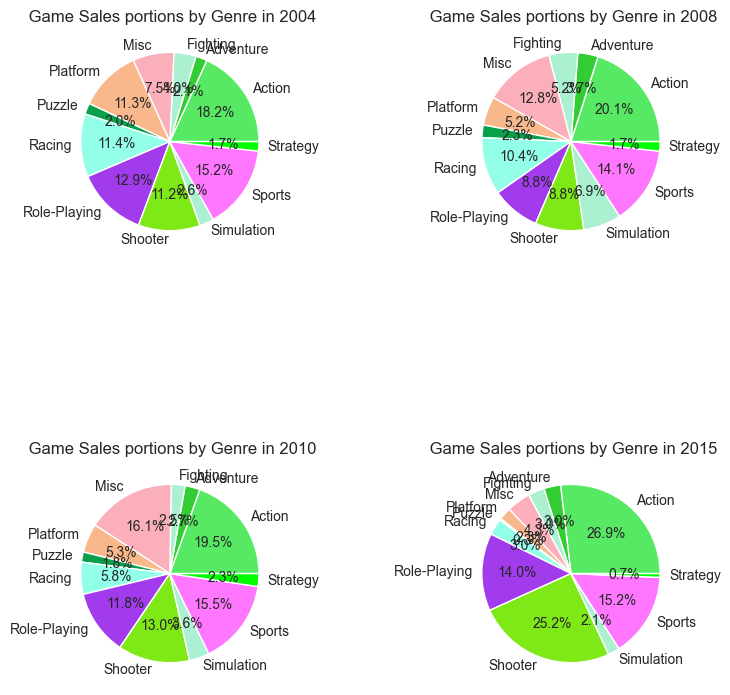

In [737]:
func(2004,2008,2010,2015)

In [664]:
# now a function to compare two years statistics
def compare_two_years(year1,year2):
    d1=year_statistic(year1)
    d2=year_statistic(year2)
    t1=['top ten best sales games in '+str(year1),'Top 7 video platfroms with largest sales in '+str(year1),
           'Top 7 video games publishers with best sales in '+str(year1),'Video game sales for Top 5 genre in '+str(year1)]
    t2=['top ten best sales games in '+str(year2),'Top 7 video platfroms with largest sales in '+str(year2),
           'Top 7 video games publishers with best sales in '+str(year2),'Video game sales for Top 5 genre in '+str(year2)]
    fig,axes=plt.subplots(4,2,figsize=(10,25))
    s=list(d1.keys())
    z=0
    for i in range(4):
        
            sns.barplot(ax=axes[i,z],x=d1[s[i]].values,y=d1[s[i]].index)
            
            axes[i,z].set_title(t1[i],fontweight='heavy',fontsize=15,color='indigo',loc='left')
            axes[i,z].set_xlabel('Sales',fontweight='heavy')
            
            z=z+1
            sns.barplot(ax=axes[i,z],x=d2[s[i]].values,y=d2[s[i]].index)
            axes[i,z].set_title(t2[i],fontweight='heavy',fontsize=15,color='green',loc='left')
            axes[i,z].set_xlabel('Sales',fontweight='heavy')
            z=0
    plt.subplots_adjust(wspace=2,hspace=0.9)
    plt.suptitle(str(year1)+ " VS "+str(year2)+" Game Sales",fontweight='heavy',fontsize=40)


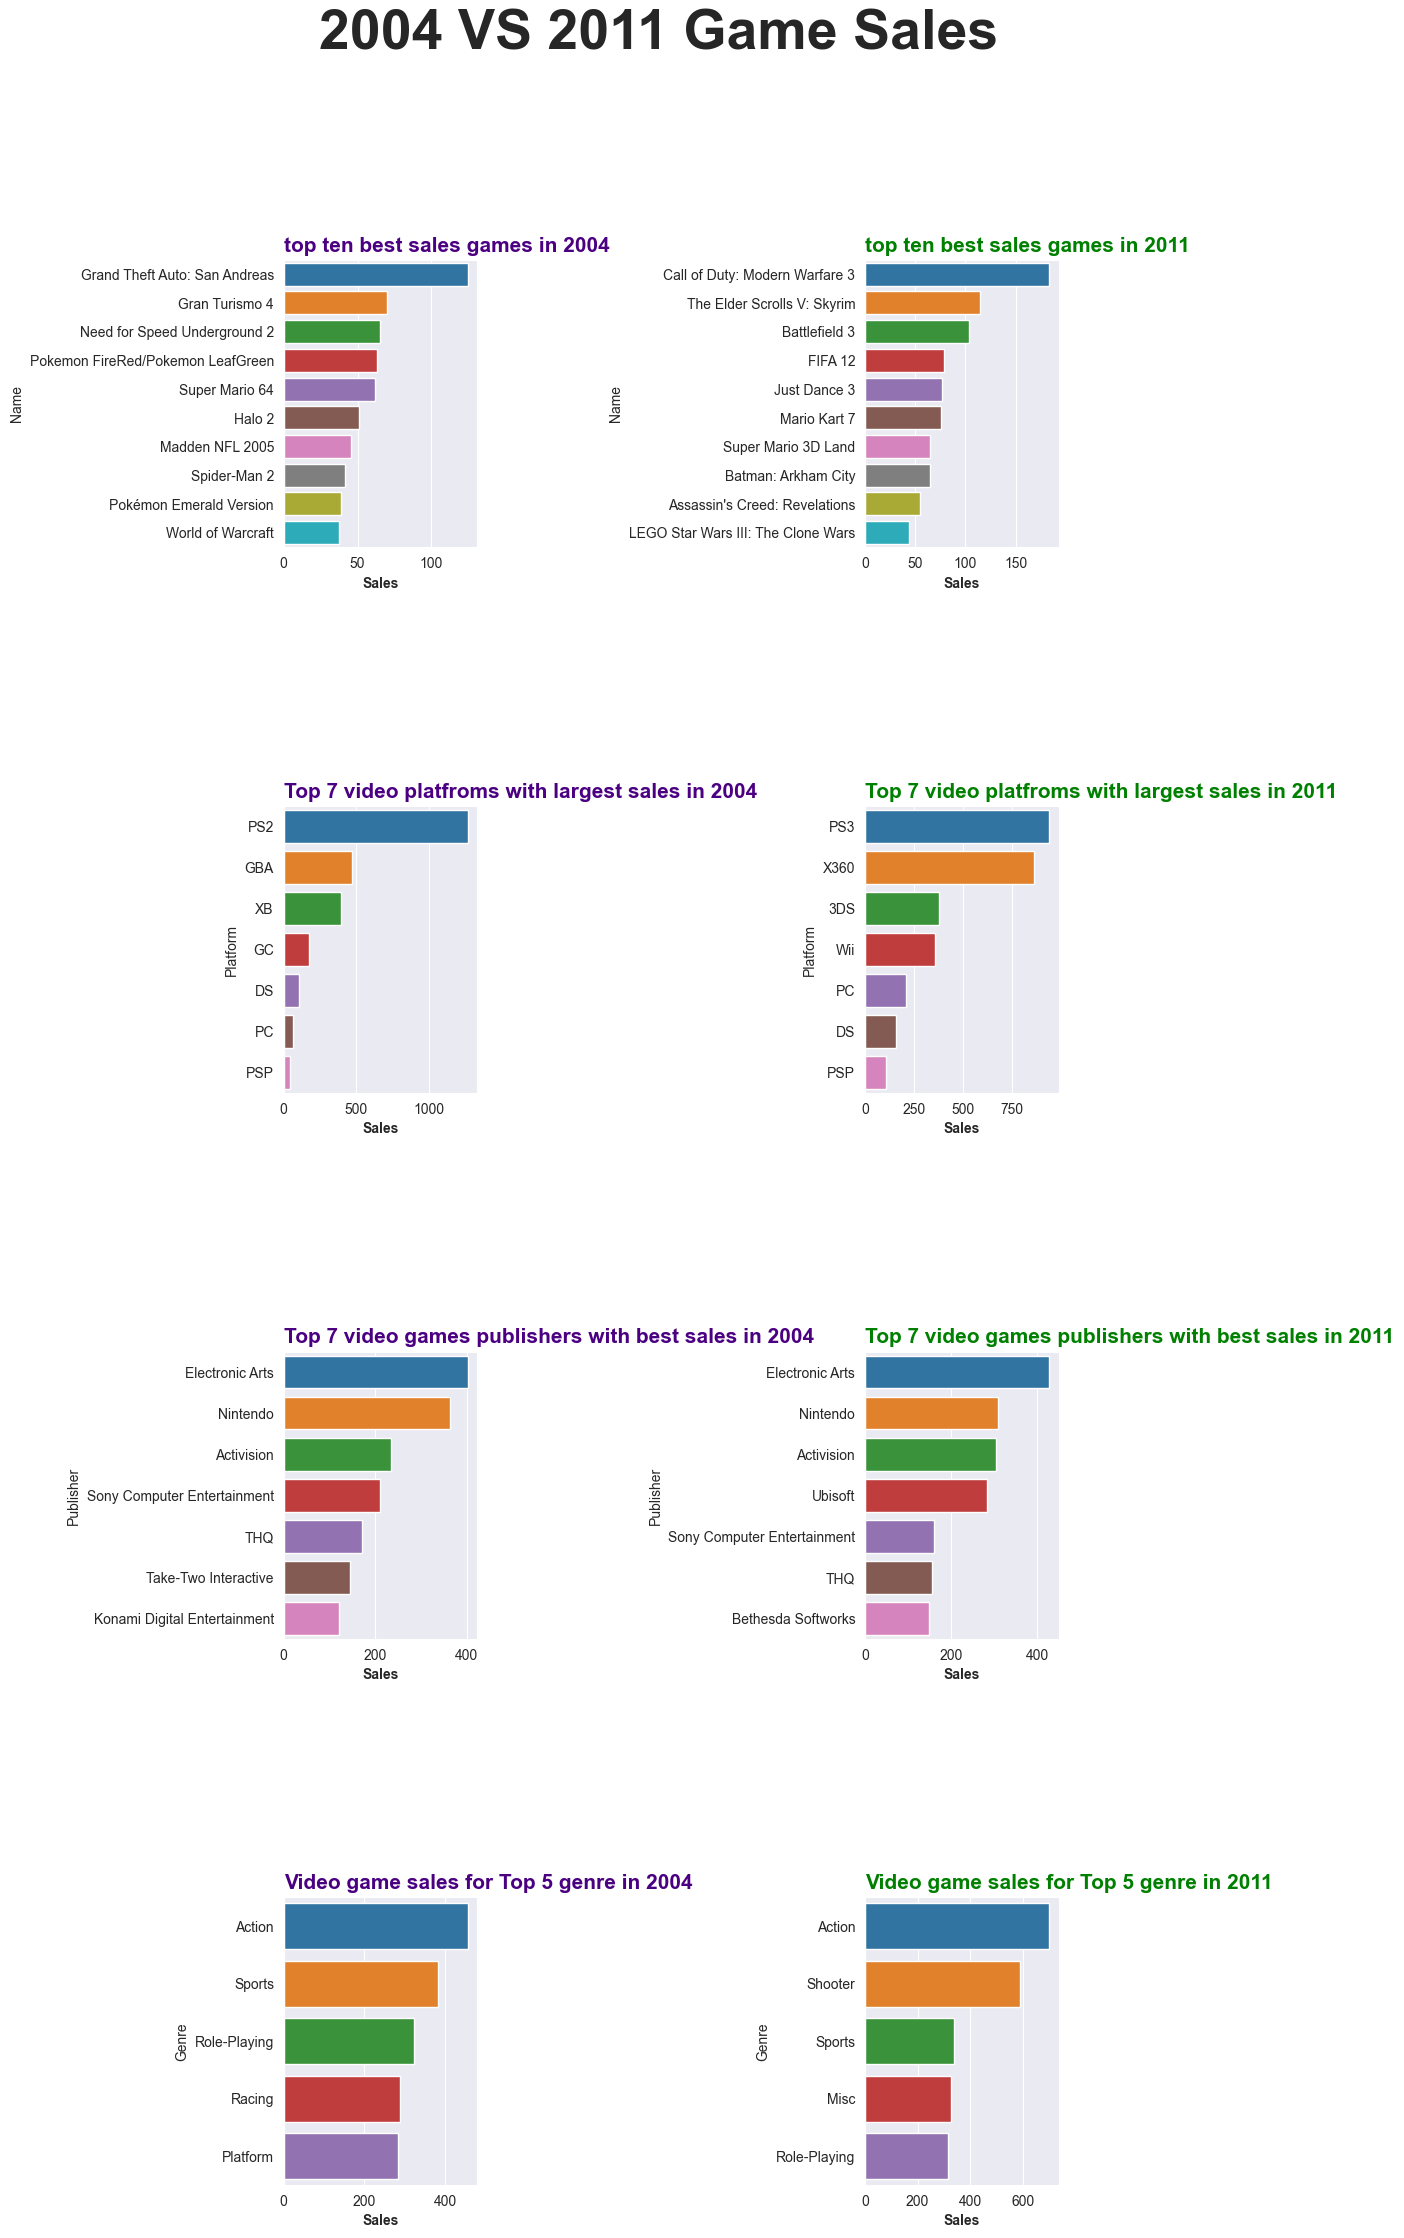

In [665]:
compare_two_years(2004,2011)



        #sns.barplot(ax=axes[i+1],y=d2[value].values,x=d1[value].index)
    

<AxesSubplot:>

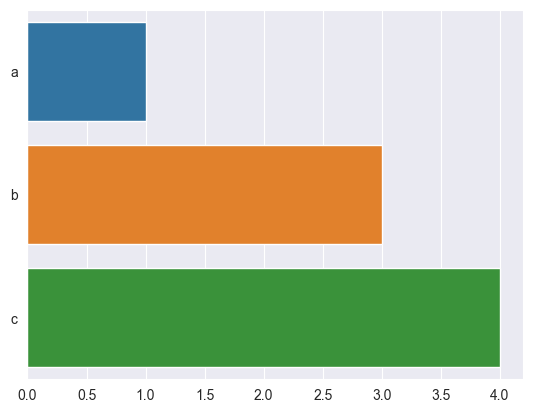

In [559]:
sns.barplot(x=[1,3,4],y=['a','b','c'])

In [587]:
d1

{'Names': Name
 Grand Theft Auto: San Andreas        124.86
 Gran Turismo 4                        69.93
 Need for Speed Underground 2          64.92
 Pokemon FireRed/Pokemon LeafGreen     62.94
 Super Mario 64                        61.80
 Halo 2                                50.91
 Madden NFL 2005                       45.60
 Spider-Man 2                          41.52
 Pokémon Emerald Version               38.49
 World of Warcraft                     37.74
 Name: Total_Sales, dtype: float64,
 'Platforms': Platform
 PS2    1270.77
 GBA     468.00
 XB      392.76
 GC      173.13
 DS      103.62
 PC       62.40
 PSP      42.51
 Name: Total_Sales, dtype: float64,
 'Publishers': Publisher
 Electronic Arts                 403.53
 Nintendo                        363.15
 Activision                      235.44
 Sony Computer Entertainment     210.75
 THQ                             172.26
 Take-Two Interactive            144.63
 Konami Digital Entertainment    121.05
 Name: Total_Sales, dty

In [603]:
s

['Names', 'Platforms', 'Publishers', 'Genre']

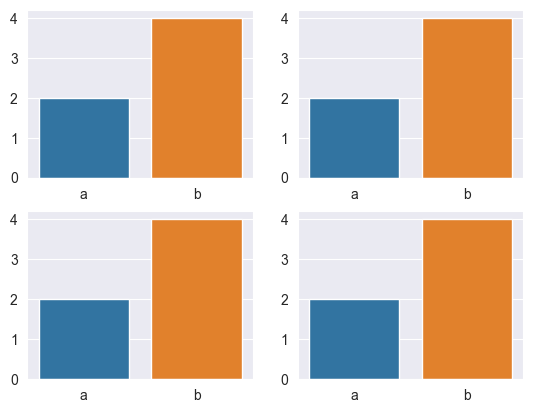

In [605]:
fig,axes=plt.subplots(2,2)
for i in range(2):
    for j in range(2):
    
       sns.barplot(ax=axes[i,j],x=['a','b'],y=[2,4])

In [668]:
kr=dff.groupby('Year_of_Release')['Total_Sales'].sum()
rang=np.arange(1980,2025,5)
fz=kr[kr.index.isin(rang)]
fz

Year_of_Release
1980.0      68.28
1985.0     323.67
1990.0     296.28
1995.0     528.69
2000.0    1209.72
2005.0    2748.39
2010.0    3542.16
2015.0    1608.09
2020.0       1.74
Name: Total_Sales, dtype: float64

In [674]:
# now we want to see how much the sales increased as a percentage did it increase 50% 30% or much larger than that?
dx=pd.DataFrame(fz.values,columns=['Sales'],index=fz.index)
dx

,Sales
Year_of_Release,
1980.0,68.28
1985.0,323.67
1990.0,296.28
1995.0,528.69
2000.0,1209.72
2005.0,2748.39
2010.0,3542.16
2015.0,1608.09
2020.0,1.74


In [683]:
percentage_of_increase=[round((dx.iloc[i+1]-dx.iloc[i])/dx.iloc[i],1) for i in range(len(dx)-1)]
percentage_of_increase

[Sales    3.7
 dtype: float64,
 Sales   -0.1
 dtype: float64,
 Sales    0.8
 dtype: float64,
 Sales    1.3
 dtype: float64,
 Sales    1.3
 dtype: float64,
 Sales    0.3
 dtype: float64,
 Sales   -0.5
 dtype: float64,
 Sales   -1.0
 dtype: float64]

In [684]:
kr 

Year_of_Release
1980.0      68.28
1981.0     214.35
1982.0     173.22
1983.0     100.77
1984.0     302.13
1985.0     323.67
1986.0     222.45
1987.0     130.32
1988.0     283.29
1989.0     440.70
1990.0     296.28
1991.0     193.38
1992.0     456.99
1993.0     290.43
1994.0     475.23
1995.0     528.69
1996.0    1194.90
1997.0    1206.15
1998.0    1538.28
1999.0    1507.08
2000.0    1209.72
2001.0    1988.79
2002.0    2371.44
2003.0    2146.02
2004.0    2513.19
2005.0    2748.39
2006.0    3107.79
2007.0    3630.36
2008.0    4029.87
2009.0    3953.10
2010.0    3542.16
2011.0    3046.11
2012.0    2135.04
2013.0    2167.44
2014.0    1989.12
2015.0    1608.09
2016.0     780.12
2017.0       0.36
2020.0       1.74
Name: Total_Sales, dtype: float64

In [688]:
kr.index=np.array(kr.index,dtype='int')
kr.resample('5Y')


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [689]:
pd.Peroid(1980,2020)

AttributeError: module 'pandas' has no attribute 'Peroid'

In [712]:
test=pd.DataFrame(kr.iloc[:-3].values,columns=['Sales'],index=pd.period_range(start=1980,end=2015,freq='1Y'))
test

,Sales
1980,68.28
1981,214.35
1982,173.22
1983,100.77
1984,302.13
1985,323.67
1986,222.45
1987,130.32
1988,283.29
1989,440.70


In [714]:
tt=test.resample('5Y').sum()
tt

,Sales
1980,68.28
1985,323.67
1990,296.28
1995,528.69
2000,1209.72
2005,2748.39
2010,3542.16
2015,1608.09


Text(0.5, 1.0, 'Total sales of video games every 5 Years')

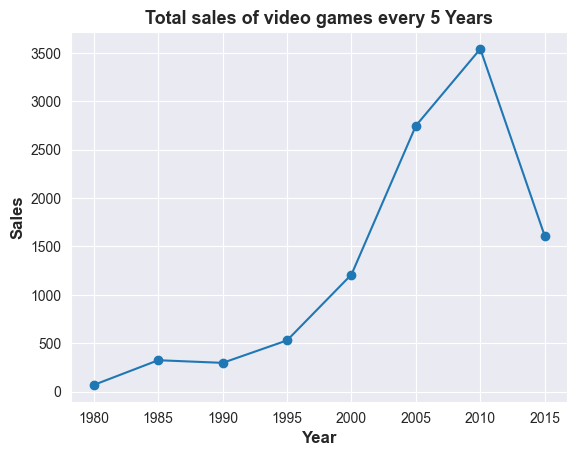

In [727]:
# now tt variable has the sum of sales each five years
# we will see how much in percentage did it increase or decrease
plt.plot(np.arange(1980,2020,5),tt.values,marker='o')
plt.xlabel('Year',fontweight='heavy',fontsize='large')
plt.ylabel('Sales',fontweight='heavy',fontsize='large')
plt.title('Total sales of video games every 5 Years',fontweight='heavy',fontsize=13)

from the chart above we can see that starting from 1990 the sales amounts of video games increased much every 5 years
the largest increase in sales was between 2005 and 2010 which somehow can be called the golden age of video games industry
after 2010 there was a sharp decrease in the amount of sales which means that sales of games were outside golden age
which meant the end of golden age after that the sales decreased each year which may mean that games in (2010 to 2020) were no longer popular
like when they were in (2000,2009) interval and from 2010 to 2015 the sales decreased 54% which means that sales in interval
[2010,2015] are only half the sales gained in interval from 2005 to 2010

CONCLUSION:
- we studied the video games sales between 1980 and 2020

- the number of games released started to increase each year starting from year 1991 and the number of games reached
the climax between years 2006 to 2010 which was the golden time for video games sales and the sales reached
the climax in the same interval.

 - after 2010 the sales of video games started to decrease each year which means that their polularity has decreased
and we can notice the clear relationship between number of publishers and sales and say that number
of publishers increase with the increase of sales and decreases with the decrease of sales.

- most of years action games were the most popular and had the highest sales among all types of games

- Nintendo company has the highest sales among all publishers in golden age (2008,2009) and the its game Mario Kart Wii was
the game with highest sales in 2008 .